In [1]:

import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def add_binary (high_low_list,length):
     if high_low_list[length-1] == 0: 
          high_low_list[length-1] = 1
          return high_low_list
     else: 
          high_low_list[length-1] = 0
          return add_binary(high_low_list,length-1)

In [3]:
def make_output (high_low_list, df_out):
     df_out.append(list(high_low_list))
     number_of_ones = 0
     for i in range(len(high_low_list)):
          if high_low_list[i] == 1: number_of_ones += 1
     if number_of_ones == len(high_low_list): return df_out

     length = len(high_low_list)
     high_low_list = add_binary(high_low_list,length)

     return make_output(high_low_list, df_out)

In [159]:
df2

array([[1.00000017, 0.90024606],
       [1.00000081, 0.99781069],
       [0.99999982, 0.99982231],
       ...,
       [1.00000002, 0.96914651],
       [1.0000005 , 0.0250734 ],
       [0.99999981, 0.03827442]])

In [88]:
np.std(df2, axis = 0)

array([1.52886489, 2.49853082])

In [34]:
files = 3 # number of solution files to process
# dataset = pd.read_csv('dataset_multinode.csv')
dataset = pd.DataFrame()

number_of_nodes = []

cfg_name = 'TS{}.cfg'
cfg_list = []
col_list_full = []
for i in range(0,files):
     cfg_list.append(open(cfg_name.format(i)))
     lines = cfg_list[i].readlines()
     number_of_nodes.append(int(lines[30][14]+lines[30][15]))
     col_list_single = []
     for j in range(number_of_nodes[i]):
          if j == 9: col_list_single.append(lines[31+j][3])
          else: col_list_single.append(lines[31+j][2])
     col_list_full.append(col_list_single)

topo_name = 'TS{}.topo'
topo_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue
     topo_list.append(pd.read_csv(topo_name.format(i), sep = '\t'))
     topo_list[i]

df_name = 'TS{}_solution.dat'
df_list = []

for i in range(0,files):

     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue 
     if number_of_nodes[i] == 2: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2"]))
     if number_of_nodes[i] == 3: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3"]))
     if number_of_nodes[i] == 4: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4"]))
     if number_of_nodes[i] == 5: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5"]))
     if number_of_nodes[i] == 6: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6"]))
     if number_of_nodes[i] == 7: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6","7"]))
     if number_of_nodes[i] == 8: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6","7","8"]))
     if number_of_nodes[i] == 9: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6","7","8","9"]))
     if number_of_nodes[i] == 10: df_list.append(pd.read_csv(df_name.format(i), sep="\t", names=["serial","states","1","2","3","4","5","6","7","8","9","10"]))

par_name = 'TS{}_parameters.dat'
par_list = []
for i in range(0,files):
     # if i == 1 or i == 10 or i == 13 or i == 23 or i == 26: continue
     par_list.append(pd.read_csv(par_name.format(i), sep="\t", header=None))

for j in range(len(topo_list)):
     
     # col_list = []
     # cfg = cfg_list[j]
     # lines = cfg.readlines()
     # for i in range(number_of_nodes[j]):
     #      col_list.append(lines[31+i][2])
     #      # lines[31][2]; col2 = lines[32][2]; col3 = lines[33][2]; col4 = lines[34][2]; col5 = lines[35][2]; col6 = lines[36][2]
     col_list = col_list_full[j]

     topo = topo_list[j]
     df1 = df_list[j]
     par = par_list[j]
     par_selective_columns = []
     for i in range(2*number_of_nodes[j]+1):
          par_selective_columns.append(i+1)

     par = par[par_selective_columns]
     par = par.rename(columns = {1: 'states'})
     for column in range(number_of_nodes[j]):
          par = par.rename(columns = {column+2: col_list[column]+'p'})
     for column in range(number_of_nodes[j]):
          par = par.rename(columns = {number_of_nodes[j]+column+2: col_list[column]+'d'})
     temp_states = df1['states']

     nodes = [['A',0,0],['B',1,0],['C',2,0],['D',3,0],['E',4,0],['F',5,0],['G',6,0],['H',7,0],['I',8,0],['J',9,0]]
     nodes = nodes[:number_of_nodes[j]]
     node_to_index_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9}

     for i in range (len(topo)):
          nodes[node_to_index_dict[topo['Source'][i]]][2] += 1
          # nodes[node_to_index_dict[topo['Target'][i]]][2] += 1
          nodes[node_to_index_dict[topo['Source'][i]]].append(node_to_index_dict[topo['Target'][i]])
          nodes[node_to_index_dict[topo['Source'][i]]].append(topo['Type'][i])
          # nodes[node_to_index_dict[topo['Target'][i]]].append(node_to_index_dict[topo['Source'][i]])

     # production/degradation normalization and z normalization of the sultion file
     df2 = np.array(df1.drop(['serial','states'], axis = 'columns'))
     df2 = 2**df2

     # dfp = []
     # ddf = []
     # for i in range(len(df1)):
     #      temp1 = []
     #      for col in col_list:
     #           temp1.append(par[col+'p'][df1.serial[i]-1])
     #      dfp.append(temp1)

     #      temp2 = []
     #      for col in col_list:
     #           temp2.append(par[col+'d'][df1.serial[i]-1])
     #      ddf.append(temp2)

     # dfp = np.array(dfp)
     # ddf = np.array(ddf)
     # dfpbyd = dfp/ddf

     # df2 = df2/dfpbyd
     # # df2 = np.log2(df2)
     # df3 = np.sum(df2, axis = 0)
     # df4 = np.std(df2, axis = 0)
     # df3 = df3/(len(df2))
     # # df2 = (df2-0.5)
     # df2 = (df2-df3)/df4
     
     df1 = pd.DataFrame(df2, columns=col_list)

     df_out = []
     node_names = []
     for i in range(len(nodes)):
          node_names.append(nodes[i][0])
     df_out.append(node_names)
     freq_total = [0]*((2**len(nodes))+1)
     high_low_list = []
     for i in range(len(nodes)):
          high_low_list.append(0)
     df_out = make_output(high_low_list,df_out)

     for row in range(len(df_out)):
          if row == 0: continue
          for state in range(len(df1)): 
               # for node in range(len(node_names)):
               node = 0
               while node < len(node_names):
                    if df_out[row][node] == 1:
                         if df1[node_names[node]][state]>0.01: pass
                         else: 
                              node = len(node_names)
                              continue
                    if df_out[row][node] == 0:
                         if df1[node_names[node]][state]<0.01: pass
                         else: 
                              node = len(node_names)
                              continue
                    if node == len(node_names)-1: freq_total[row] += 1
                    node+=1
                    
     df_out = pd.DataFrame(df_out, columns = df_out[0])
     freq_total = np.array(freq_total)
     freq_total = freq_total/len(df1)
     freq_total = freq_total*10000
     freq_total = freq_total.astype('int')
     df_out['freq_total'] = freq_total
     df_out.drop(0, axis = 0, inplace = True)

     # pedge_arr00 = []
     # for hl_state in range (len(df_out)):
     #      pedge00 = 0
     #      for node_info in nodes:
     #           if df_out[node_info[0]][hl_state+1] == 0:
     #                for conn in node_info[3:]:
     #                     if df_out[node_names[conn]][hl_state+1] == 0: pedge00 += 1
     #      pedge_arr00.append(pedge00)
     
     # pedge_arr00 = np.array(pedge_arr00)
     # pedge_arr00 = pedge_arr00/2
     
     # pedge_arr11 = []
     # for hl_state in range (len(df_out)):
     #      pedge11 = 0
     #      for node_info in nodes:
     #           if df_out[node_info[0]][hl_state+1] == 1:
     #                for conn in node_info[3:]:
     #                     if df_out[node_names[conn]][hl_state+1] == 1: pedge11 += 1
     #      pedge_arr11.append(pedge11)
     
     # pedge_arr11 = np.array(pedge_arr11)
     # pedge_arr11 = pedge_arr11/2
     
     # pnode_arr = []
     # for hl_state in range (len(df_out)):
     #      pnode = 0
     #      for node_info in nodes:
     #           if df_out[node_info[0]][hl_state+1] == 0:
     #                lows = 0
     #                for conn in node_info[3:]:
     #                     if df_out[node_names[conn]][hl_state+1] == 0: lows += 1
     #                if lows == len(node_info[3:]): pnode += 1
     #      pnode_arr.append(pnode)

     edges = 0
     for node_info in nodes:
          edges += node_info[2]

     df_out['nodes'] = number_of_nodes[j]
     df_out['edges'] = edges
     # df_out['pedge00'] = pedge_arr00
     # df_out['pedge11'] = pedge_arr11
     # df_out['pnode'] = pnode_arr
     # df_out['total_states'] = 2**number_of_nodes[j]
     # df_out['total_states'] = len(df1)

     # df_out = df_out.drop(node_names, axis = 1)
     print(df_out)
     print(topo)
     dataset = pd.concat([pd.DataFrame(df_out),dataset],ignore_index = True)

# dataset.to_csv('dataset_8_node.csv')

   A  B  freq_total  nodes  edges
1  0  0           0      2      1
2  0  1           0      2      1
3  1  0           0      2      1
4  1  1       10000      2      1
  Source Target  Type
0      B      A     2
   A  B  freq_total  nodes  edges
1  0  0           0      2      1
2  0  1           0      2      1
3  1  0           0      2      1
4  1  1       10000      2      1
  Source Target  Type
0      B      A     1
   A  B  freq_total  nodes  edges
1  0  0           0      2      2
2  0  1           5      2      2
3  1  0           0      2      2
4  1  1        9994      2      2
  Source Target  Type
0      B      A     1
1      B      A     2


In [30]:
par_list[2][7][i]

4.0

In [33]:
sum = 0
for i in range(1000):
     sum += par_list[2][10][i]-par_list[2][7][i]
print (sum)

19.0


In [11]:
low = 0
high = 0
for i in range (len(df1)):
     if df1['A'][i] < 0: low += 1
     if df1['A'][i] > 0: high += 1
low,high

(1385, 8615)

<function matplotlib.pyplot.show(close=None, block=None)>

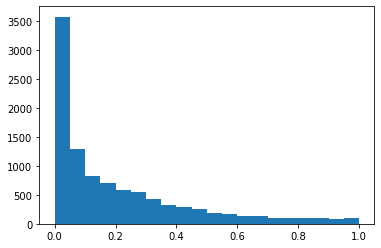

In [14]:
plt.hist(df1['A'], bins = 20)
plt.show

In [228]:
low = 0
high = 0
for i in range (len(df1)):
     if df1['A'][i] < 0: low += 1
     if df1['A'][i] > 0: high += 1
low,high

(1385, 8615)

<function matplotlib.pyplot.show(close=None, block=None)>

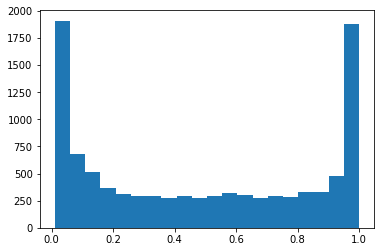

In [16]:
plt.hist(df1['A'], bins = 20)
plt.show

In [226]:
low = 0
high = 0
for i in range (len(df1)):
     if df1['A'][i] < 0: low += 1
     if df1['A'][i] > 0: high += 1
low,high

(522, 9478)

<function matplotlib.pyplot.show(close=None, block=None)>

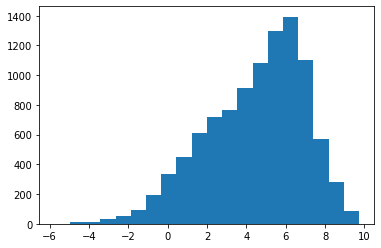

In [223]:
plt.hist(df1['A'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

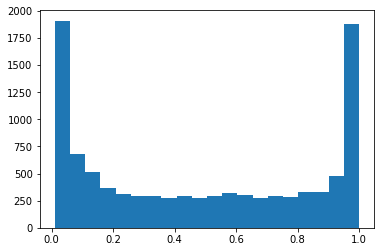

In [214]:
plt.hist(df1['A'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

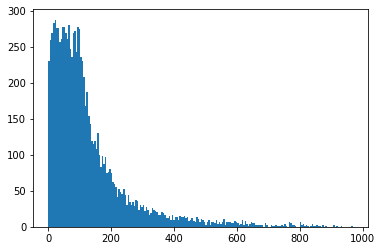

In [36]:
plt.hist(df1['B'], bins = 200)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

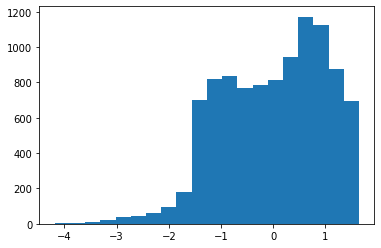

In [201]:
plt.hist(df1['A'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

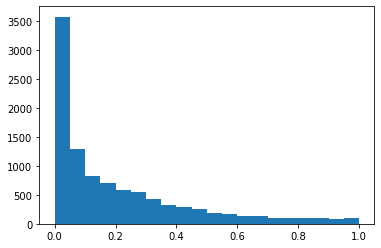

In [182]:
plt.hist(df1['A'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

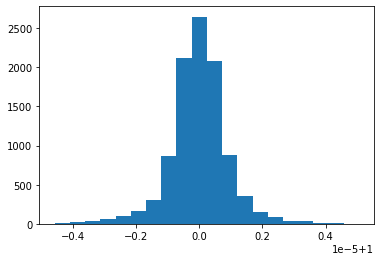

In [183]:
plt.hist(df1['B'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

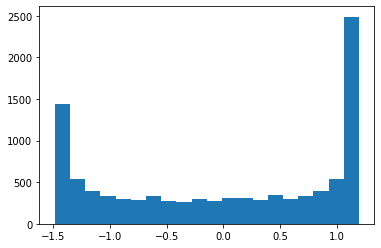

In [149]:
plt.hist(df1['A'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

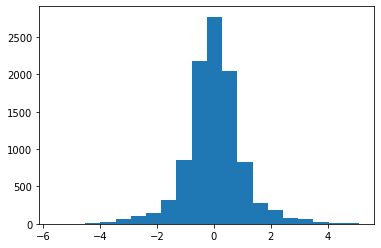

In [150]:
plt.hist(df1['B'], bins = 20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

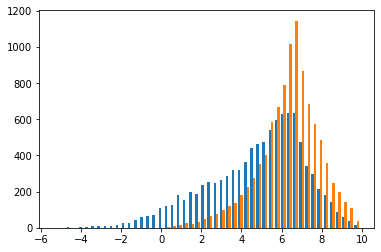

In [102]:
plt.hist([df1['A'],df1['B']], bins = 50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

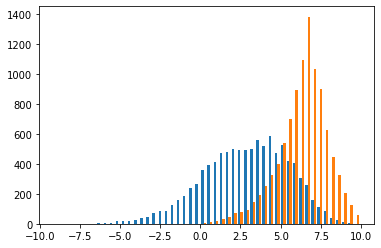

In [104]:
plt.hist([df1['A'],df1['B']], bins = 50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

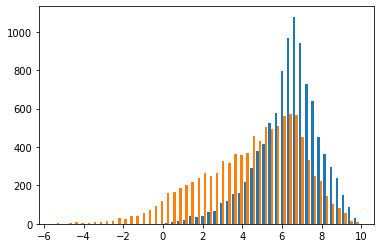

In [106]:
plt.hist([df1['A'],df1['B']], bins = 50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

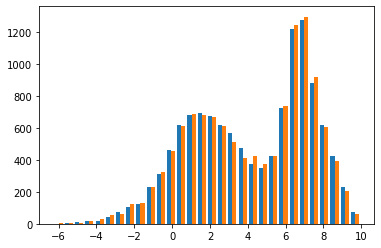

In [109]:
plt.hist([df1['A'],df1['B']], bins = 30)
plt.show

In [34]:
df1

,A,B
0,-2.197774e-06,0.348400
1,5.552257e-07,1.663075
2,-8.007824e-07,-2.451874
3,-1.627671e-06,1.815869
4,1.475765e-06,-1.391878
...,...,...
99995,-1.168843e-07,-2.535709
99996,9.907694e-07,-0.713641
99997,1.854482e-06,0.685432
99998,-2.023047e-06,-4.041471


In [9]:
topo

,Source,Target,Type
0,B,A,2


In [12]:
   A  B  freq_total  nodes  edges
1  0  0        1060      2      1
2  0  1        3345      2      1
3  1  0        3343      2      1
4  1  1        2252      2      1
  Source Target  Type
0      B      A     2

,Source,Target,Type
0,B,A,1


In [ ]:
   A  B  freq_total  nodes  edges
1  0  0           0      2      1
2  0  1        3793      2      1
3  1  0           0      2      1
4  1  1        6206      2      1
   A  B  freq_total  nodes  edges
1  0  0           0      2      1
2  0  1        3491      2      1
3  1  0           0      2      1
4  1  1        6508      2      1

In [163]:
pd.set_option('display.max_rows',1000)